In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from pylab import rcParams
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [17]:
df1=pd.read_csv("C:/Users/Swarupa/Desktop/Terrorism_cleaned.csv")

In [18]:
df=df1[['iyear','imonth','iday',"individual","nperps","nperpcap","nkill","nkillus","nkillter","nwound","nwoundus","nwoundte","propvalue","nhostkid","nhostkidus","nhours","ndays","ransomamt","ransomamtus","ransompaid","ransompaidus","nreleased"]]

In [19]:
df.head()

,iyear,imonth,iday,individual,nperps,nperpcap,nkill,nkillus,nkillter,nwound,...,propvalue,nhostkid,nhostkidus,nhours,ndays,ransomamt,ransomamtus,ransompaid,ransompaidus,nreleased
0,1970,7,2,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,1,1,0,-99.0,-99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,1,2,0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,1,2,0,-99.0,-99.0,0.0,0.0,0.0,0.0,...,22500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0,...,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df2=df[df.columns.difference(['iyear','imonth','iday'])]

In [21]:
df2.head()

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,0.0,0.0,0.0,0.0,22500.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0


In [22]:
df2.shape

(169459, 19)

In [23]:
df2.head()

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.0,-99.0,0.0,0.0,0.0,0.0,22500.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0


In [24]:
df2.fillna(0,inplace=True)
mat=df2.as_matrix(columns=None)
mat=np.transpose(mat)
for i in range(19):
    mat[i]=(mat[i]/mat[i].max())*100
mat=np.transpose(mat)
df2=pd.DataFrame(mat,columns = df2.columns.values)

C:\Users\Swarupa\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
df2

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.0,0.000000,0.000000,0.0,0.00000,0.066667,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,-24.384236,-0.396,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.012,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,-24.384236,-0.396,0.000000,0.000000,0.0,0.000000,0.000833,0.000,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.246305,0.004,0.000000,0.000000,0.0,0.000000,0.002222,0.000,0.0,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.246305,0.004,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
7,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,-24.384236,-0.396,0.000000,0.000000,0.0,0.000000,0.000011,0.000,0.0,0.000000,0.0
8,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.004,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0
9,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,-24.384236,-0.396,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.0


In [26]:
pca=decomposition.PCA()
pca_t= pca.fit_transform(mat)

In [27]:
pca.explained_variance_ratio_[0]

0.57476751678141169

In [28]:
pca.explained_variance_ratio_

array([ 0.57476752,  0.13683519,  0.11356157,  0.04839536,  0.04332732,
        0.01779874,  0.01680931,  0.01180143,  0.01013563,  0.00550762,
        0.00370945,  0.00357088,  0.00289044,  0.00272664,  0.00247629,
        0.00178234,  0.00170424,  0.00134141,  0.0008586 ])

In [29]:
components= pd.DataFrame(pca.components_,columns = df2.columns.values)

In [30]:
components

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.999938,0.000618,0.000108,-0.009194,-0.000922,-0.000115,-0.000296,0.000607,0.004354,0.001493,0.002289,0.000550,-0.000113,0.003324,0.000660,-0.000024,-0.000009,-0.000039,-0.000017
1,-0.004371,-0.001074,0.000169,-0.001401,0.000714,0.003324,0.000818,0.000039,0.999944,0.008446,-0.001926,0.000750,0.001049,-0.000849,0.000027,-0.000016,0.000038,0.000006,0.000065
2,-0.009144,-0.024548,0.000634,-0.998124,-0.039285,-0.020092,0.000070,-0.022119,-0.001375,-0.000030,-0.012131,-0.021790,-0.000329,0.000776,-0.000086,-0.000206,0.000019,-0.000119,-0.000588
3,-0.001302,0.351549,0.007245,-0.044376,0.733482,-0.007020,-0.000334,-0.002407,0.000801,0.014530,0.579757,0.001050,0.000874,0.000095,0.000119,0.002205,0.000282,0.001222,0.000331
4,0.002224,-0.390572,-0.010424,-0.009097,0.678324,-0.015181,-0.001637,-0.001854,-0.002006,-0.004799,-0.621955,-0.005114,-0.000917,0.000244,-0.000037,-0.002639,-0.000394,-0.002720,-0.000207
5,-0.000488,-0.352307,0.024576,-0.016900,0.008371,0.691680,0.468684,0.165033,-0.003408,0.036831,0.209111,0.234061,0.222385,0.014599,0.003361,-0.003276,-0.000844,-0.004779,-0.001956
6,0.000411,0.773589,-0.018397,-0.023495,0.011574,0.299848,0.224599,0.073763,-0.001535,0.003869,-0.481722,0.099172,0.112379,0.007611,0.001532,0.007006,0.001607,0.008940,0.003301
7,-0.001437,0.003608,-0.000893,0.000564,-0.007472,-0.007338,-0.042065,-0.000943,-0.008371,0.998350,-0.017769,0.001281,-0.031800,0.000518,0.000326,0.000364,-0.000244,0.001495,0.000597
8,0.000775,-0.014769,-0.014479,0.022190,-0.006799,-0.402172,0.601862,-0.273039,0.000266,0.039444,0.012656,-0.354370,0.521797,-0.029870,-0.006685,-0.000332,-0.000105,-0.000051,0.000209
9,-0.000645,-0.003128,-0.010036,-0.010355,-0.001392,-0.124188,-0.446427,0.229141,-0.000332,0.004846,0.000239,0.350479,0.779495,0.044538,0.009928,-0.000275,0.000025,-0.000176,-0.000205


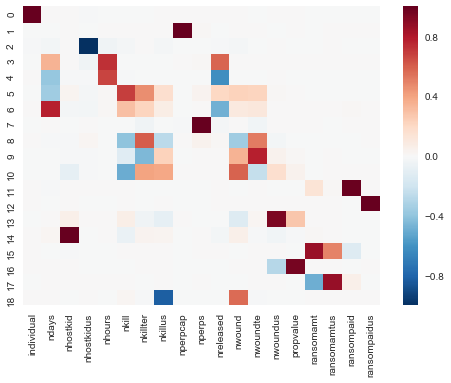

In [31]:
sb.heatmap(components)
sb.set_style('whitegrid')
plt.show()

In [32]:
df1["individual"]=df2["individual"]
df1["nperps"]= df2["nperps"]
df1["nperpcap"]=df2["nperpcap"]
df1["nkill"]=df2["nkill"]
df1["nkillus"]=df2["nkillus"]
df1["nkillter"]=df2["nkillter"]
df1["nwound"]=df2["nwound"]
df1["nwoundus"]=df2["nwoundus"]
df1["nwoundte"]=df2["nwoundte"]
df1["propvalue"]=df2["propvalue"]
df1["nhostkid"]=df2["nhostkid"]
df1["nhostkidus"]=df2["nhostkidus"]
df1["nhours"]=df2["nhours"]
df1["ndays"]=df2["ndays"]
df1["ransomamt"]=df2["ransomamt"]
df1["ransomamtus"]=df2["ransomamtus"]
df1["ransompaid"]=df2["ransompaid"]
df1["ransompaidus"]=df2["ransompaidus"]
df1["nreleased"]=df2["nreleased"]

In [ ]:
del df1['eventid']

In [33]:
df1.to_csv("Terrorism_normalized.csv", encoding='utf-8',index=False)

In [35]:
df1.head()

,eventid,iyear,imonth,iday,individual,nperps,nperpcap,nkill,nkillus,nkillter,...,vicinity,weapdetail,weapsubtype1_txt,weapsubtype2_txt,weapsubtype3_txt,weapsubtype4_txt,weaptype1_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt
0,197000000001,1970,7,2,0.0,0.000,0.000000,0.066667,0.0,0.0,...,No,None,None,None,None,None,Unknown,None,None,None
1,197001010002,1970,1,1,0.0,-0.396,-24.384236,0.000000,0.0,0.0,...,No,Several gunshots were fired.,Unknown Gun Type,None,None,None,Firearms,None,None,None
2,197001020001,1970,1,2,0.0,0.012,0.000000,0.000000,0.0,0.0,...,No,Automatic firearm,Automatic Weapon,None,None,None,Firearms,None,None,None
3,197001020002,1970,1,2,0.0,-0.396,-24.384236,0.000000,0.0,0.0,...,No,None,Unknown Explosive Type,None,None,None,Explosives/Bombs/Dynamite,None,None,None
4,197001020003,1970,1,2,0.0,0.004,0.246305,0.000000,0.0,0.0,...,No,Firebomb consisting of gasoline,Molotov Cocktail/Petrol Bomb,None,None,None,Incendiary,None,None,None


In [34]:
def read_data():
    with open('C:/Users/Swarupa/Desktop/SocialWeather/SocialWeather/Terrorism_normalized.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('C:/Users/Swarupa/Desktop/SocialWeather/SocialWeather/Terrorism_normalized.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]

def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'Swarupa'
    password = ''
    dbname = 'SocialWeather'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'

    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    length=len(b);
    print(b);
    narr=(b[-1])
    narr[-1]=narr[-1].split('\n',1)[0]
    print(narr); # getting /n (new line?,why?)
    print("Create database: " + dbname)
    #client.create_database(dbname)
    a = read_data();
    for metric in a:
        for i in range(len(narr)):
            influx_metric = [{
                'measurement': 'Terrorism_normalized',
                'tags': {
                    'items': narr[i]                },
                'time':str(metric[0])+"-"+str(metric[1])+"-"+str(metric[2])+"T00:00:00Z",
                'fields': {
                    'value': metric[i].split('\n',1)[0]

                }
            }]
            client.write_points(influx_metric)

    
if __name__ == '__main__':
    main()

NameError: name 'InfluxDBClient' is not defined